In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [53]:
titanic = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Data Science Internship\tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.shape

(418, 12)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [27]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
describe = titanic.describe()

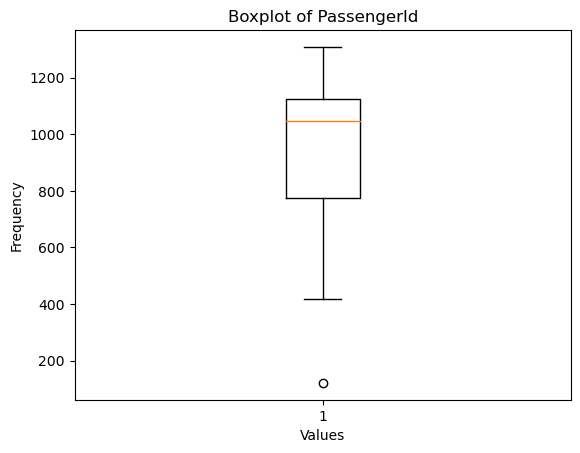

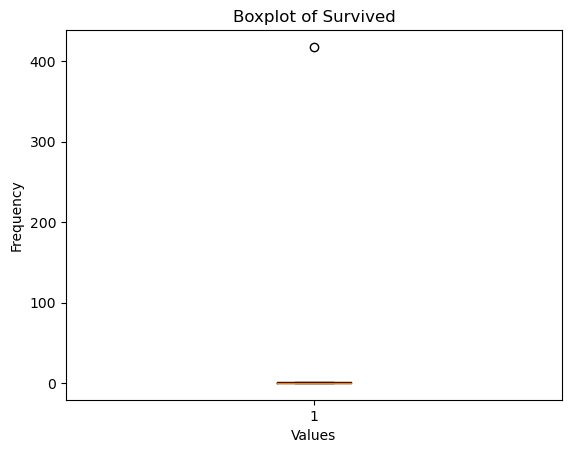

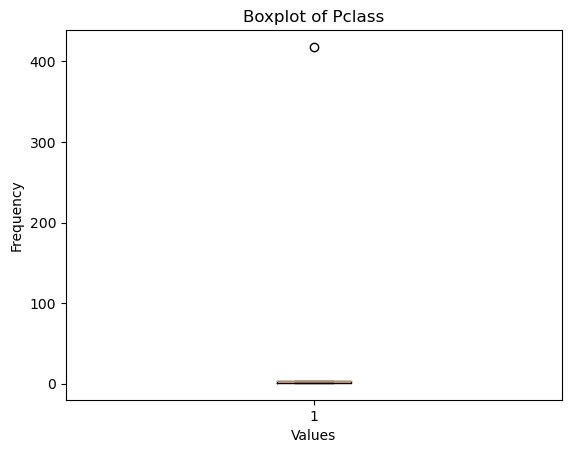

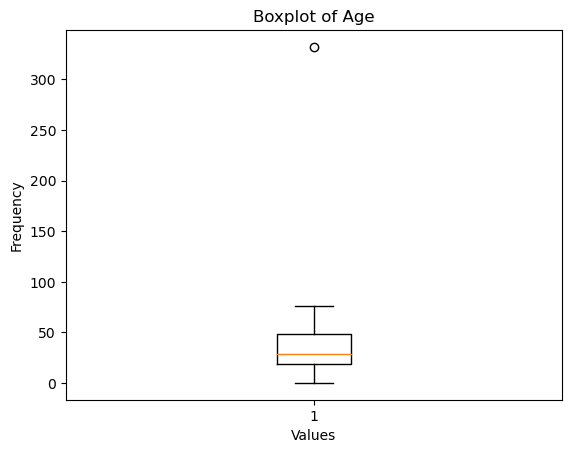

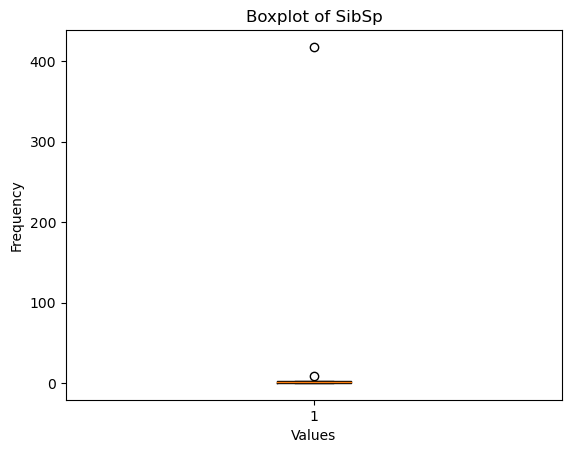

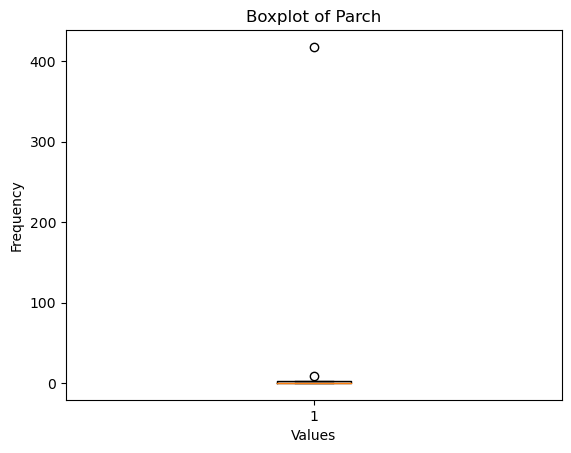

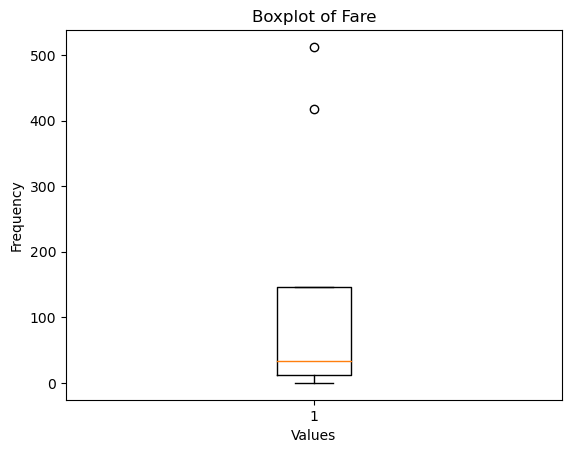

In [23]:
for column in describe:
    plt.figure()  
    plt.boxplot(describe[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


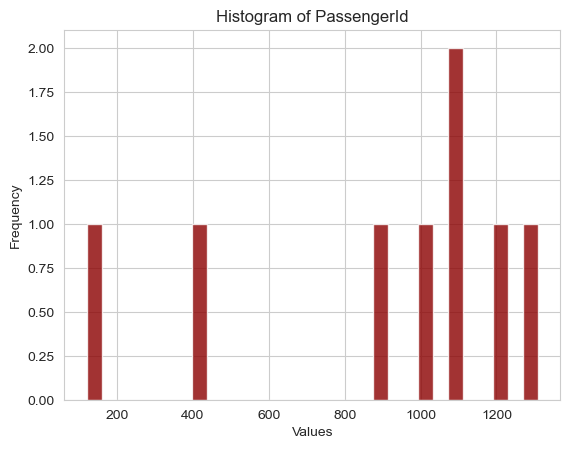

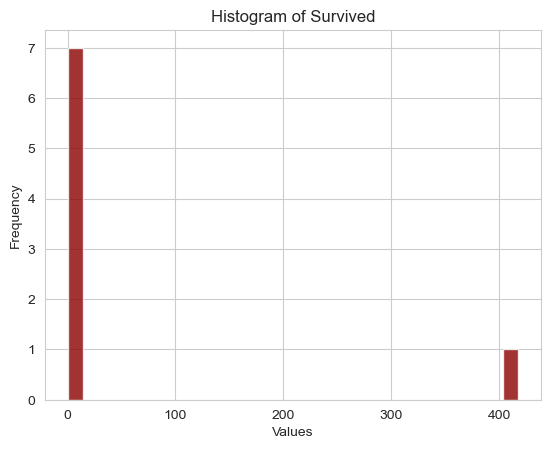

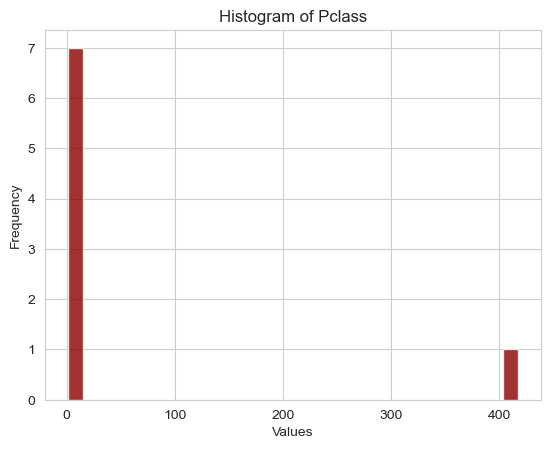

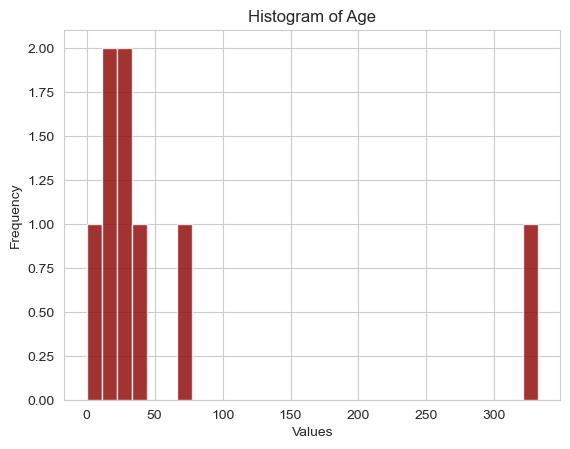

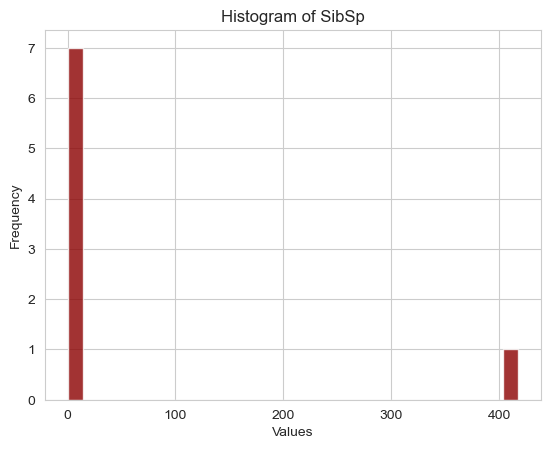

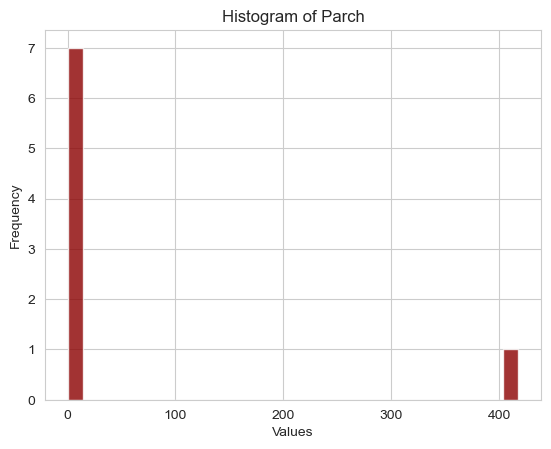

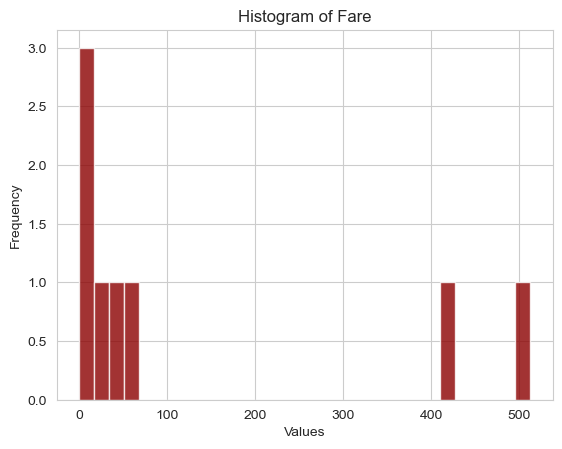

In [43]:
for column in describe:
    plt.figure() 
    plt.hist(describe[column], bins=30, color='darkred', alpha=0.8) 
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


In [28]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

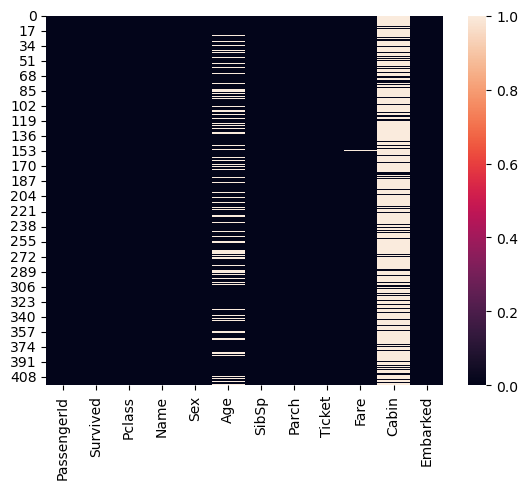

In [30]:
sns.heatmap(titanic.isnull())

In [32]:
titanic["Survived"].unique()

array([0, 1], dtype=int64)

In [33]:
titanic["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

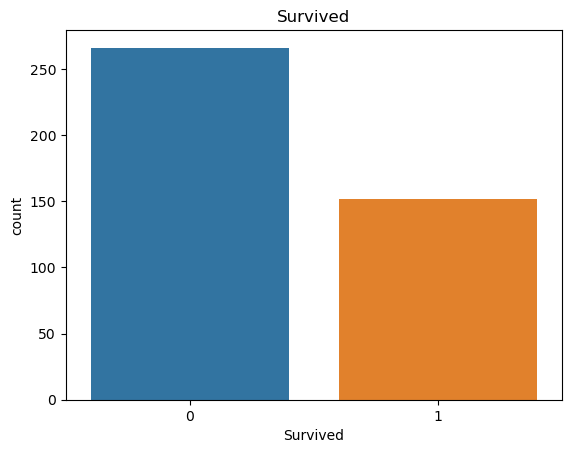

In [35]:
sns.countplot(x = titanic["Survived"])
plt.title("Survived")
plt.show()

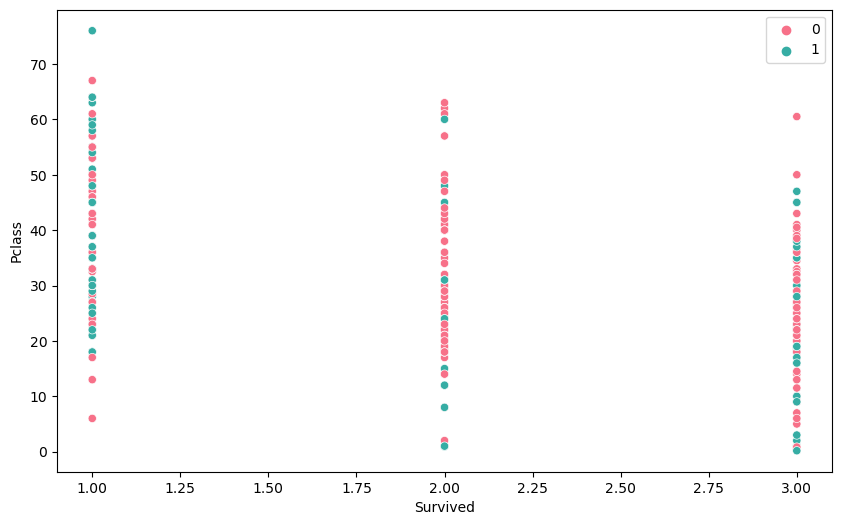

In [36]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y = titanic["Age"] , x = titanic["Pclass"] ,hue = titanic["Survived"] ,palette = "husl")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.legend()

<Axes: xlabel='Survived', ylabel='count'>

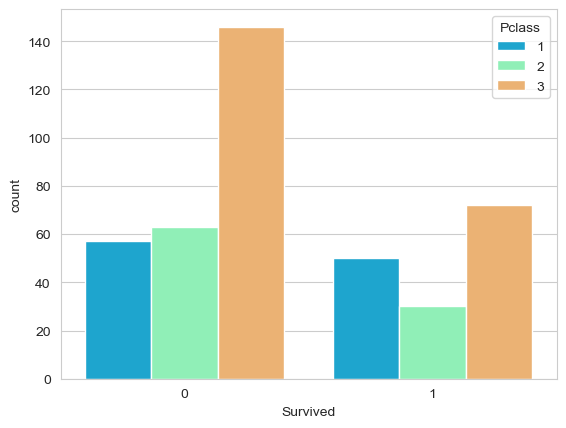

In [37]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass',data = titanic,palette = 'rainbow')

<Axes: >

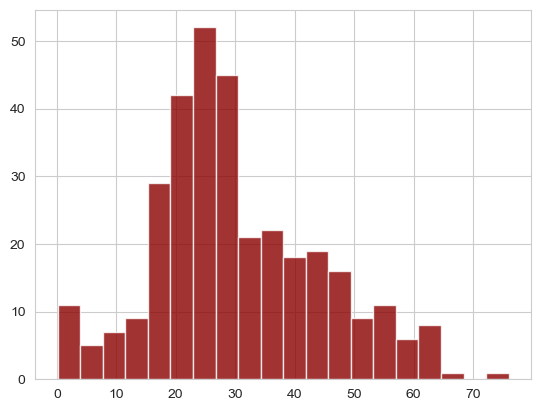

In [41]:
titanic['Age'].hist(bins = 20,color = 'darkred',alpha = 0.8)

In [54]:
print(titanic.columns)
titanic.head(2)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [55]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic= titanic.dropna(subset=['Fare', 'Age'])

In [56]:
print(titanic.columns)
titanic.head(2)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [58]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

In [59]:
# Preprocessing the titanic.Sex using label_encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])

In [60]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750
411,1,0,37.0,1,0,90.0000
412,3,0,28.0,0,0,7.7750
414,1,0,39.0,0,0,108.9000


In [62]:
# Split the titanic data into trai and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
print(x_train, x_test, y_train, y_test)

     Pclass  Sex    Age  SibSp  Parch     Fare
281       3    1   0.75      1      1  13.7750
96        1    0  76.00      1      0  78.8500
341       3    1  32.00      0      0   7.5792
18        3    0  27.00      1      0   7.9250
26        1    0  22.00      0      1  61.9792
..      ...  ...    ...    ...    ...      ...
237       3    1  20.00      0      0   7.2250
86        3    0  27.00      0      0   7.8792
134       3    1  43.00      0      0   7.8958
345       3    0  16.00      0      0   7.6500
128       2    1  42.00      0      0  13.0000

[264 rows x 6 columns]      Pclass  Sex   Age  SibSp  Parch     Fare
27        3    1  22.5      0      0   7.2250
389       3    1   6.0      3      1  21.0750
89        2    1   2.0      1      1  23.0000
280       3    0  23.0      0      0   8.6625
68        1    1  31.0      0      0  28.5375
..      ...  ...   ...    ...    ...      ...
397       1    0  48.0      1      1  79.2000
3         3    1  27.0      0      0   8.662

# ML Model Building

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [66]:
# Predictions
y_pred = LR_model.predict(x_test)

In [84]:
# Model Accuracy
from sklearn.metrics import accuracy_score
LR_Accuracy = accuracy_score(y_test,y_pred)
LR_Accuracy

1.0

In [69]:
# Classification report
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Text(60.222222222222214, 0.5, 'Actual')

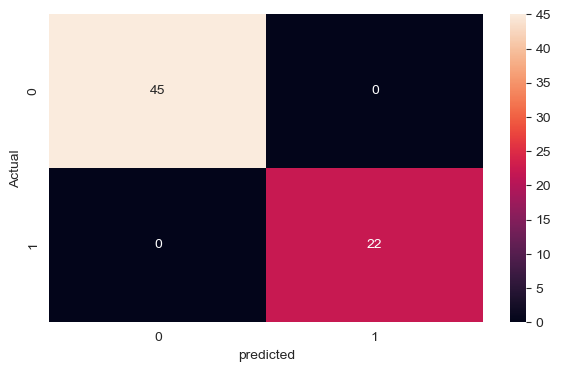

In [73]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7, 4))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [75]:
# Decission Tree

from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
DT_model.score(x_test, y_test)

1.0

In [77]:
# Predictions
y_preds = DT_model.predict(x_test)

In [83]:
# Model Accuracy
DT_Accuracy = accuracy_score(y_test,y_preds)

In [80]:
# Classification report
print(cr(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Text(60.222222222222214, 0.5, 'Actual')

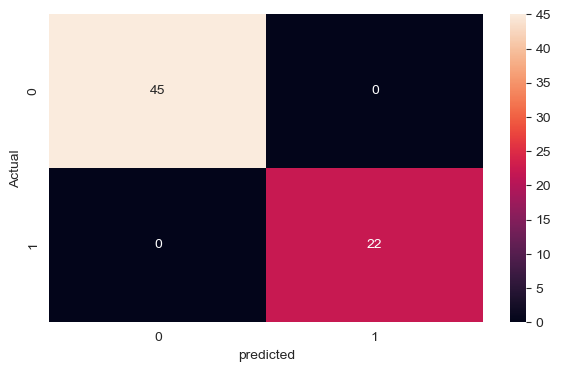

In [82]:
cm2 = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(7, 4))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

# Models Accuracy

In [86]:
models=pd.DataFrame({
    'models':['Logistic_Regression', 'Decsion_Treee'],
    'accuracy_scores':[LR_Accuracy, DT_Accuracy]})
models.sort_values(by='accuracy_scores',ascending=False)

,models,accuracy_scores
0,Logistic_Regression,1.0
1,Decsion_Treee,1.0
